<a href="https://colab.research.google.com/github/rakshitakaushik/Prediction-of-lunar-effects-using-machine-learning/blob/main/Magnitude_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving UK_Lunar_Data.csv to UK_Lunar_Data (4).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
moonphase = pd.read_csv("UK_Lunar_Data.csv")

In [ ]:
moonphase

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,MoonriseEarly,Moonset,MoonriseLate,Phase,PhaseTime,CivilDawn,CivilDusk
0,01-01-2005,NaN,11:11,22:11,NaN,NaN,07:26,16:42
1,02-01-2005,NaN,11:23,23:25,NaN,NaN,07:26,16:43
2,03-01-2005,NaN,11:34,NaN,Third Quarter,17:45,07:26,16:44
3,04-01-2005,00:40,11:45,NaN,NaN,NaN,07:25,16:45
4,05-01-2005,02:00,12:00,NaN,NaN,NaN,07:25,16:46
...,...,...,...,...,...,...,...,...
4743,27-12-2017,NaN,00:38,12:39,NaN,NaN,07:25,16:37
4744,28-12-2017,NaN,01:51,13:05,NaN,NaN,07:25,16:38
4745,29-12-2017,NaN,03:07,13:34,NaN,NaN,07:26,16:39
4746,30-12-2017,NaN,04:26,14:10,NaN,NaN,07:26,16:40


**MODIFYING THE  DATE FORMAT**

In [ ]:
moonphase['Date'] = pd.to_datetime(moonphase['Date'], format='%d-%m-%Y').dt.strftime('%m-%d-%Y')

#Display the modified DataFrame
print(moonphase)


            Date MoonriseEarly Moonset MoonriseLate          Phase PhaseTime  \
0     01-01-2005           NaN   11:11        22:11            NaN       NaN   
1     01-02-2005           NaN   11:23        23:25            NaN       NaN   
2     01-03-2005           NaN   11:34          NaN  Third Quarter     17:45   
3     01-04-2005         00:40   11:45          NaN            NaN       NaN   
4     01-05-2005         02:00   12:00          NaN            NaN       NaN   
...          ...           ...     ...          ...            ...       ...   
4743  12-27-2017           NaN   00:38        12:39            NaN       NaN   
4744  12-28-2017           NaN   01:51        13:05            NaN       NaN   
4745  12-29-2017           NaN   03:07        13:34            NaN       NaN   
4746  12-30-2017           NaN   04:26        14:10            NaN       NaN   
4747  12-31-2017           NaN   05:44        14:54            NaN       NaN   

     CivilDawn CivilDusk  
0        07:

IMPORTING DATASET OF EARTHQUAKE

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving earthquake.csv to earthquake (4).csv


In [ ]:
earthquake = pd.read_csv("earthquake.csv")
earthquake

,Date,Time,Depth,Magnitude,Magnitude Type
0,01-02-1965,13:44:18,131.60,6.0,MW
1,01-04-1965,11:29:49,80.00,5.8,MW
2,01-05-1965,18:05:58,20.00,6.2,MW
3,01-08-1965,18:49:43,15.00,5.8,MW
4,01-09-1965,13:32:50,15.00,5.8,MW
...,...,...,...,...,...
23407,12/28/2016,08:22:12,12.30,5.6,ML
23408,12/28/2016,09:13:47,8.80,5.5,ML
23409,12/28/2016,12:38:51,10.00,5.9,MWW
23410,12/29/2016,22:30:19,79.00,6.3,MWW


In [ ]:
earthquake['Date'] = pd.to_datetime(earthquake['Date'], errors='coerce')

# Convert dates to the desired format 'm-d-y'
earthquake['Date'] = earthquake['Date'].dt.strftime('%m-%d-%y')




In [ ]:
earthquake

,Date,Time,Depth,Magnitude,Magnitude Type
0,01-02-65,13:44:18,131.60,6.0,MW
1,01-04-65,11:29:49,80.00,5.8,MW
2,01-05-65,18:05:58,20.00,6.2,MW
3,01-08-65,18:49:43,15.00,5.8,MW
4,01-09-65,13:32:50,15.00,5.8,MW
...,...,...,...,...,...
23407,NaN,08:22:12,12.30,5.6,ML
23408,NaN,09:13:47,8.80,5.5,ML
23409,NaN,12:38:51,10.00,5.9,MWW
23410,NaN,22:30:19,79.00,6.3,MWW


**MERGING THE TWO DATASET**


In [ ]:

# Convert date columns to datetime format
earthquake['Date'] = pd.to_datetime(earthquake['Date'])
moonphase['Date'] = pd.to_datetime(moonphase['Date'])

# Merge datasets on the 'Date' column
merged_data = pd.merge(earthquake[['Date', 'Depth', 'Magnitude']], moonphase[['Date', 'Phase']], on='Date', how='inner')

# Print the merged dataset
print(merged_data.head())


<ipython-input-78-94611c4928ec>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earthquake['Date'] = pd.to_datetime(earthquake['Date'])


        Date  Depth  Magnitude Phase
0 2005-01-01   24.5        5.7   NaN
1 2005-01-01   36.0        5.7   NaN
2 2005-01-01   11.7        6.7   NaN
3 2005-01-01   27.0        5.5   NaN
4 2005-01-01   55.4        6.1   NaN


In [ ]:
merged_data

,Date,Depth,Magnitude,Phase
0,2005-01-01,24.50,5.7,NaN
1,2005-01-01,36.00,5.7,NaN
2,2005-01-01,11.70,6.7,NaN
3,2005-01-01,27.00,5.5,NaN
4,2005-01-01,55.40,6.1,NaN
...,...,...,...,...
2546,2016-12-10,38.00,5.6,NaN
2547,2016-12-10,7.66,5.8,NaN
2548,2016-12-10,142.58,6.0,NaN
2549,2016-12-11,10.00,5.8,NaN


TO FILL THE MISSING VALUES IN PHASE COLUMN ,

In [ ]:
# ensure that the 'Date' column is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort the DataFrame by date
merged_data = merged_data.sort_values('Date')

# Define the arbitrary new moon date
new_moon_date = pd.to_datetime('2005-01-10')

# Define a function to label missing phases
def label_missing_phases(row):
    # Calculate the phase relative to the arbitrary new moon date
    phase_days = (row['Date'] - new_moon_date).days % 29.53  # Lunar cycle is approximately 29.53 days
    if 0 < phase_days <= 7:
        return 'towards first quarter'
    elif 7 < phase_days <= 14:
        return 'towards full moon'
    elif 14 < phase_days <= 21:
        return 'towards third quarter'
    elif 21 < phase_days <= 29.53:
        return 'towards new moon'
    else:
        return row['Phase']  # Keep the original phase value if it's not in the range we're interested in

# Apply the function to fill in missing phases
merged_data['Phase'] = merged_data.apply(label_missing_phases, axis=1)

# Now, all missing phases between phases should be labeled accordingly

# Now, all phases between the key phases are labeled accordingly


In [ ]:
merged_data

,Date,Depth,Magnitude,Phase
0,2005-01-01,24.50,5.7,towards third quarter
1,2005-01-01,36.00,5.7,towards third quarter
2,2005-01-01,11.70,6.7,towards third quarter
3,2005-01-01,27.00,5.5,towards third quarter
4,2005-01-01,55.40,6.1,towards third quarter
...,...,...,...,...
2547,2016-12-10,7.66,5.8,towards full moon
2546,2016-12-10,38.00,5.6,towards full moon
2548,2016-12-10,142.58,6.0,towards full moon
2549,2016-12-11,10.00,5.8,towards full moon


**NUMERICAL ENCODING**

In [ ]:
# Create numerical encoding
moon_phase_mapping = {
    'New Moon': 0,
    'First Quarter': 0.25,
    'Full Moon': 0.5,
    'Third Quarter': 0.75,
    'towards first quarter': 0.125,
    'towards full moon': 0.375,
    'towards third quarter': 0.625,
    'towards new moon': 0.875
}

# Map moon phase labels to numerical values
merged_data['moon_phase_numeric'] = merged_data['Phase'].map(moon_phase_mapping)

# Now, 'moon_phase_numeric' column contains the numerical encoding of moon phases



In [ ]:
merged_data

,Date,Depth,Magnitude,Phase,moon_phase_numeric
0,2005-01-01,24.50,5.7,towards third quarter,0.625
1,2005-01-01,36.00,5.7,towards third quarter,0.625
2,2005-01-01,11.70,6.7,towards third quarter,0.625
3,2005-01-01,27.00,5.5,towards third quarter,0.625
4,2005-01-01,55.40,6.1,towards third quarter,0.625
...,...,...,...,...,...
2547,2016-12-10,7.66,5.8,towards full moon,0.375
2546,2016-12-10,38.00,5.6,towards full moon,0.375
2548,2016-12-10,142.58,6.0,towards full moon,0.375
2549,2016-12-11,10.00,5.8,towards full moon,0.375


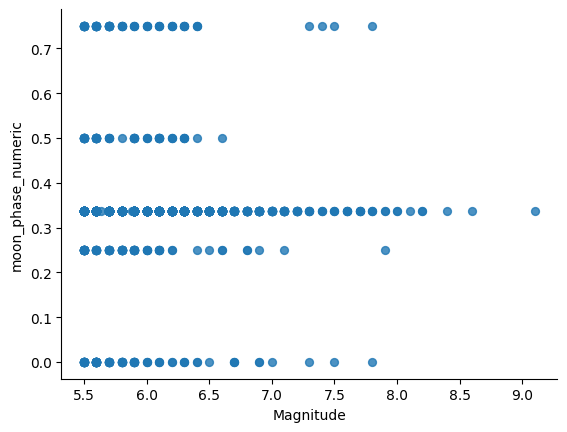

In [ ]:
# @title Magnitude vs moon_phase_numeric

from matplotlib import pyplot as plt
merged_data.plot(kind='scatter', x='Magnitude', y='moon_phase_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Replace missing values in 'Phase' with mode
merged_data['Phase'].fillna(merged_data['Phase'].mode()[0], inplace=True)

# Replace missing values in 'moon_phase_numeric' with mean
merged_data['moon_phase_numeric'].fillna(merged_data['moon_phase_numeric'].mean(), inplace=True)


In [ ]:
merged_data

,Date,Depth,Magnitude,Phase,moon_phase_numeric
0,2005-01-01,24.50,5.7,towards third quarter,0.625
1,2005-01-01,36.00,5.7,towards third quarter,0.625
2,2005-01-01,11.70,6.7,towards third quarter,0.625
3,2005-01-01,27.00,5.5,towards third quarter,0.625
4,2005-01-01,55.40,6.1,towards third quarter,0.625
...,...,...,...,...,...
2547,2016-12-10,7.66,5.8,towards full moon,0.375
2546,2016-12-10,38.00,5.6,towards full moon,0.375
2548,2016-12-10,142.58,6.0,towards full moon,0.375
2549,2016-12-11,10.00,5.8,towards full moon,0.375


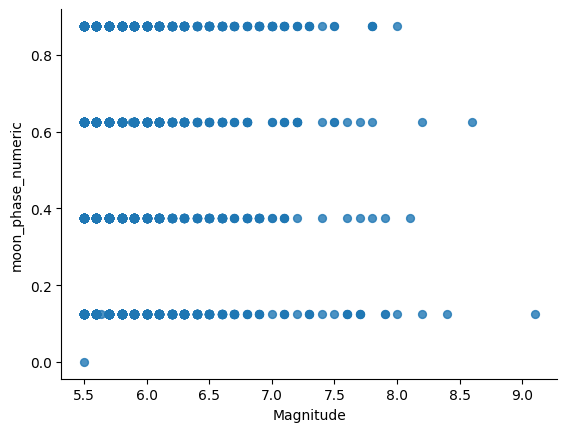

In [ ]:
# @title Magnitude vs moon_phase_numeric

from matplotlib import pyplot as plt
merged_data.plot(kind='scatter', x='Magnitude', y='moon_phase_numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

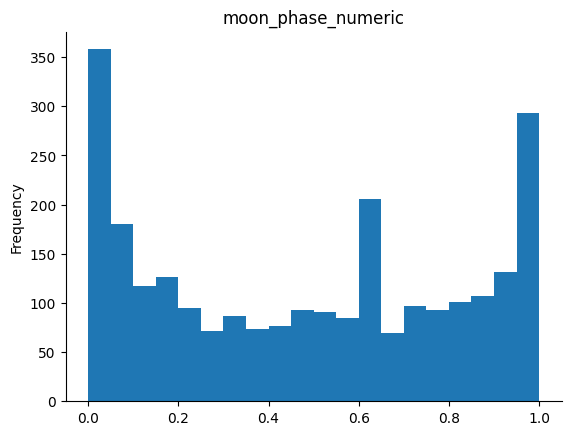

In [ ]:
# @title moon_phase_numeric

from matplotlib import pyplot as plt
merged_data['moon_phase_numeric'].plot(kind='hist', bins=20, title='moon_phase_numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

#

In [ ]:
merged_data

NameError: name 'merged_data' is not defined

In [ ]:
# Find null values corresponding to each column
null_values = merged_data.isnull().sum()

# Print the null values
print(null_values)


Date                     0
Depth                    0
Magnitude                0
Phase                 2222
moon_phase_numeric       0
Cluster                  0
dtype: int64


**SPLITTING THE DATASET INTO TRAINING AND TESTING DATA**

In [ ]:
# Select features (X) and target variables (y)
X = merged_data[['moon_phase_numeric']]
y_magnitude = merged_data['Magnitude']

# Split the data into training and testing sets
X_train, X_test, y_magnitude_train, y_magnitude_test = train_test_split(X, y_magnitude, test_size=0.2, random_state=42)



**TRAINING AND EVALUATION**

***Random Forest Regressor***

In [ ]:
# Train Random Forest Regressor model for magnitude
magnitude_model = RandomForestRegressor()
magnitude_model.fit(X_train, y_magnitude_train)

RandomForestRegressor()

In [ ]:
# Predictions
magnitude_predictions = magnitude_model.predict(X_test)

In [ ]:
# Evaluation
magnitude_rmse = mean_squared_error(y_magnitude_test, magnitude_predictions, squared=False)
print("Magnitude RMSE:", magnitude_rmse)

Magnitude RMSE: 0.4467962846422428


***Support Vector Regressor***

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Select features (X) and target variables (y)
X_magnitude = merged_data[['moon_phase_numeric']]
y_magnitude = merged_data['Magnitude']

In [ ]:
# Split the data into training and testing sets for magnitude
X_magnitude_train, X_magnitude_test, y_magnitude_train, y_magnitude_test = train_test_split(X_magnitude, y_magnitude, test_size=0.2, random_state=42)


In [ ]:
# Train SVR model for magnitude
magnitude_model = SVR(kernel='rbf')
magnitude_model.fit(X_magnitude_train, y_magnitude_train)


SVR()

In [ ]:
# Predictions for magnitude
magnitude_predictions = magnitude_model.predict(X_magnitude_test)

# Evaluation for magnitude
magnitude_rmse = mean_squared_error(y_magnitude_test, magnitude_predictions, squared=False)
print("Magnitude RMSE (SVR):", magnitude_rmse)

Magnitude RMSE (SVR): 0.4640649383755621


***Gradient Boosting Regressor***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Select features (X) and target variables (y)
X_magnitude = merged_data[['moon_phase_numeric']]
y_magnitude = merged_data['Magnitude']

In [ ]:
# Split the data into training and testing sets for magnitude
X_magnitude_train, X_magnitude_test, y_magnitude_train, y_magnitude_test = train_test_split(X_magnitude, y_magnitude, test_size=0.2, random_state=42)


In [ ]:
# Train Gradient Boosting Regressor model for magnitude
magnitude_model = GradientBoostingRegressor()
magnitude_model.fit(X_magnitude_train, y_magnitude_train)

GradientBoostingRegressor()

In [ ]:
# Predictions for magnitude
magnitude_predictions = magnitude_model.predict(X_magnitude_test)

# Evaluation for magnitude
magnitude_rmse = mean_squared_error(y_magnitude_test, magnitude_predictions, squared=False)
print("Magnitude RMSE (GradientBoostingRegressor):", magnitude_rmse)

Magnitude RMSE (GradientBoostingRegressor): 0.4466584271779702


***Ridge Regression***

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:

# Select features (X) and target variables (y)
X_magnitude = merged_data[['moon_phase_numeric']]
y_magnitude = merged_data['Magnitude']


In [ ]:

# Split the data into training and testing sets for magnitude
X_magnitude_train, X_magnitude_test, y_magnitude_train, y_magnitude_test = train_test_split(X_magnitude, y_magnitude, test_size=0.2, random_state=42)


In [ ]:

# Train Ridge Regression model for magnitude
magnitude_model = Ridge()
magnitude_model.fit(X_magnitude_train, y_magnitude_train)


Ridge()

In [ ]:

# Predictions for magnitude
magnitude_predictions = magnitude_model.predict(X_magnitude_test)

# Evaluation for magnitude
magnitude_rmse = mean_squared_error(y_magnitude_test, magnitude_predictions, squared=False)
print("Magnitude RMSE (Ridge Regression):", magnitude_rmse)

Magnitude RMSE (Ridge Regression): 0.4458399772235916


***K-Means Clustering***

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:

# Select features (X) for clustering
X_clustering = merged_data[['moon_phase_numeric']]

# Find optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_clustering)
    silhouette_avg = silhouette_score(X_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Optimal number of clusters:", optimal_n_clusters)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

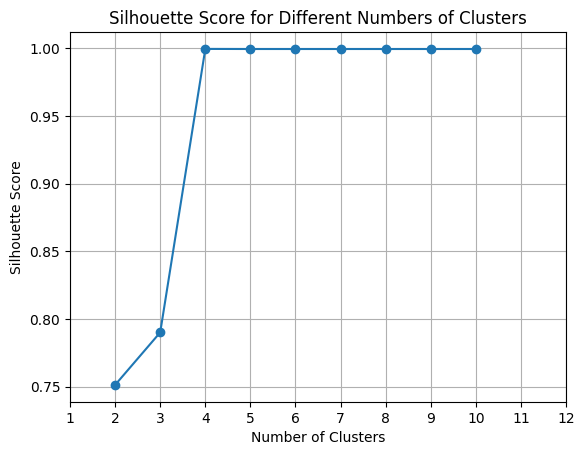

In [ ]:
import matplotlib.pyplot as plt

# Initialize list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_clustering)
    silhouette_avg = silhouette_score(X_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(np.arange(1, 13))
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Calculate the optimum number of clusters
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Optimal number of clusters:", optimal_n_clusters)


Optimal number of clusters: 4


In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_clustering)

# Predictions within each cluster
magnitude_predictions = []

for cluster in range(optimal_n_clusters):
    X_cluster = merged_data[merged_data['Cluster'] == cluster][['moon_phase_numeric']]
    magnitude_prediction = magnitude_model.predict(X_cluster)
    magnitude_predictions.extend(magnitude_prediction)

# Evaluation
y_magnitude_test = merged_data['Magnitude']
magnitude_rmse = mean_squared_error(y_magnitude_test, magnitude_predictions, squared=False)

print("Magnitude RMSE (Cluster-based prediction):", magnitude_rmse)


Magnitude RMSE (Cluster-based prediction): 0.4318576864193168


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_clustering)

# Predictions within each cluster
magnitude_predictions = []

for cluster in range(optimal_n_clusters):
    X_cluster = merged_data[merged_data['Cluster'] == cluster][['moon_phase_numeric']]
    magnitude_prediction = magnitude_model.predict(X_cluster)
    magnitude_predictions.extend(magnitude_prediction)

# Evaluation
y_magnitude_test = merged_data['Magnitude']
magnitude_rmse = mean_squared_error(y_magnitude_test, magnitude_predictions, squared=False)

print("Magnitude RMSE (Cluster-based prediction):", magnitude_rmse)

Magnitude RMSE (Cluster-based prediction): 0.4318576864193168


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


***Comparison between the models***

**SAMPLE PREDICTION**

In [ ]:
# Example input for K-Means prediction
sample_input = [[0.25]]  # Sample moon phase numeric value

# Predict the cluster for the sample input
predicted_cluster = kmeans.predict(sample_input)

# Filter data for the predicted cluster and make predictions
cluster_data = merged_data[merged_data['Cluster'] == predicted_cluster[0]]
magnitude_prediction = magnitude_model.predict(sample_input)

print("Sample Input:", sample_input)
print("Predicted Cluster:", predicted_cluster[0])
print("Magnitude Prediction:", magnitude_prediction[0])


Sample Input: [[0.25]]
Predicted Cluster: 1
Magnitude Prediction: 5.832224027931793


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


**Feedforward neural network**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'moon_phase_numeric' is your feature and 'Magnitude' is your target
X = merged_data[['moon_phase_numeric']].values
y = merged_data['Magnitude'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)


Epoch 1/100
64/64 [==============================] - 1s 3ms/step - loss: 23.4544
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 3.6269
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 1.0274
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5489
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3359
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2403
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2026
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1897
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1865
Epoch 10/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1859
Epoch 11/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1848
Epoch 12/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1850
Epoch 13/100
64/64 [================

In [ ]:
# Define a function to predict magnitude based on moon phase numeric
def predict_magnitude(moon_phase_numeric):
    # Scale the input feature
    scaled_input = scaler_X.transform(np.array([[moon_phase_numeric]]))
    # Reshape for LSTM
    input_lstm = scaled_input.reshape((1, 1, scaled_input.shape[1]))
    # Predict magnitude
    predicted_magnitude = model.predict(input_lstm)
    return predicted_magnitude[0][0]

# Example usage:
moon_phase_numeric_input = 0.25  # Input your moon phase numeric value here
predicted_magnitude = predict_magnitude(moon_phase_numeric_input)
print("Predicted Magnitude:", predicted_magnitude)


1/1 [==============================] - 0s 94ms/step
Predicted Magnitude: 5.925226


In [ ]:

# Define a function to predict magnitude based on moon phase
def predict_magnitude_from_phase(phase):
    # Create a mapping of moon phase labels to numerical values
    moon_phase_mapping = {
        'New Moon': 0,
        'First Quarter': 0.25,
        'Full Moon': 0.5,
        'Third Quarter': 0.75,
        'towards first quarter': 0.125,
        'towards full moon': 0.375,
        'towards third quarter': 0.625,
        'towards new moon': 0.875
    }

    # Convert moon phase to moon phase numeric using the mapping
    moon_phase_numeric = moon_phase_mapping.get(phase)

    # Assuming you have a function predict_magnitude to predict magnitude based on moon phase numeric
    predicted_magnitude = predict_magnitude(moon_phase_numeric)

    return predicted_magnitude

# Example usage:
moon_phase_input = 'Full Moon'  # Input your moon phase here
predicted_magnitude = predict_magnitude_from_phase(moon_phase_input)
print("Predicted Magnitude for", moon_phase_input, ":", predicted_magnitude)


1/1 [==============================] - 0s 66ms/step
Predicted Magnitude for Full Moon : 5.8728704


In [ ]:
# Define a function to predict magnitude based on moon phase
def predict_magnitude_from_phase(phase):
    # Create a mapping of moon phase labels to numerical values
    moon_phase_mapping = {
        'New Moon': 0,
        'First Quarter': 0.25,
        'Full Moon': 0.5,
        'Third Quarter': 0.75,
        'towards first quarter': 0.125,
        'towards full moon': 0.375,
        'towards third quarter': 0.625,
        'towards new moon': 0.875
    }

    # Convert moon phase to moon phase numeric using the mapping
    moon_phase_numeric = moon_phase_mapping.get(phase)

    # Assuming you have a function predict_magnitude to predict magnitude based on moon phase numeric
    predicted_magnitude = predict_magnitude(moon_phase_numeric)

    return predicted_magnitude

# Get unique moon phase labels from your dataset
unique_phases = merged_data['Phase'].unique()

# Predict magnitude for each unique moon phase
phase_magnitude_predictions = {}
for phase in unique_phases:
    predicted_magnitude = predict_magnitude_from_phase(phase)
    phase_magnitude_predictions[phase] = predicted_magnitude

# Display predictions for each phase
for phase, magnitude in phase_magnitude_predictions.items():
    print("Predicted Magnitude for", phase, ":", magnitude)


1/1 [==============================] - 0s 40ms/step
Predicted Magnitude for towards third quarter : 5.8742914
Predicted Magnitude for towards new moon : 5.852135
Predicted Magnitude for New Moon : 6.0095787
Predicted Magnitude for towards first quarter : 5.937071
Predicted Magnitude for towards full moon : 5.901029


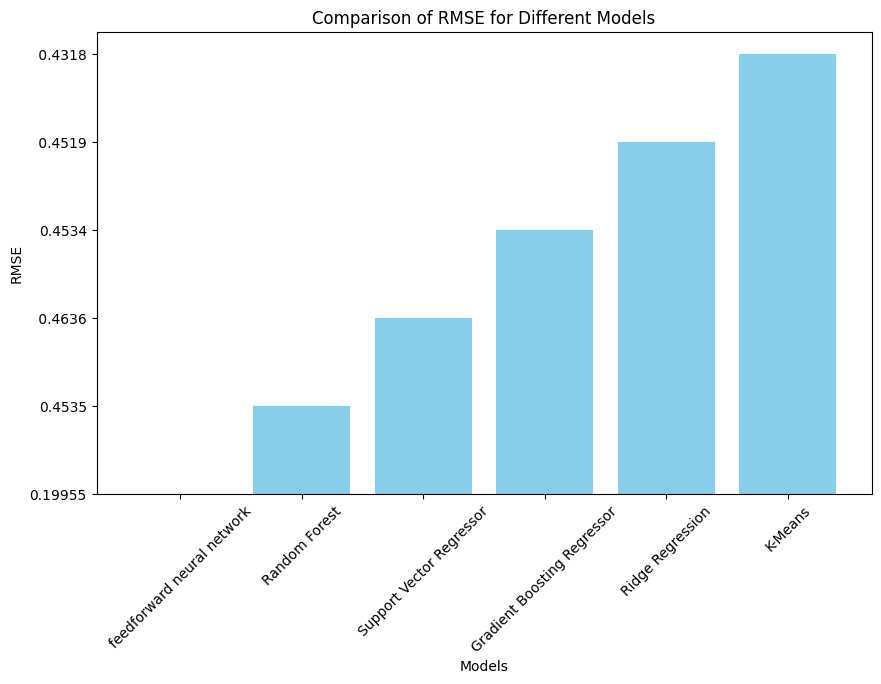

In [ ]:
# Models and their RMSE
models = ['feedforward neural network', 'Random Forest', 'Support Vector Regressor', 'Gradient Boosting Regressor', 'Ridge Regression', 'K-Means']
rmse_values = ['0.19955','0.4535',' 0.4636','0.4534',' 0.4519',' 0.4318',]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.title('Comparison of RMSE for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()
